# Machine Learning for Data Science

**Chunran Yao**     
**cy2511**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# Problem 1

In [9]:
score = pd.read_csv("hw4_data/CFB2018_scores.csv",header = None)

In [10]:
def construct_matrix(data):
    """
    Construct the unnormalized random walk matrix
    Parameters:
        data: dataframe, containing the flow between the objects, the columns are A index, A points, B index, B points.
        the index are from 1
    Returns:
        M: normalized random walk matrix  
    """
    items = data.iloc[:,0].unique()
    n = len(items)
    M = np.zeros((n,n))
    for k in range(0,data.shape[0]):
        i = data.iloc[k,0]
        j = data.iloc[k,2]
        #no matter which team wins, all 4 score needs to be updated
        if data.iloc[k,1]>data.iloc[k,3]:  #Team A wins
            M[i-1][i-1] = M[i-1][i-1]+1+data.iloc[k,1]/(data.iloc[k,1]+data.iloc[k,3])
            M[j-1][i-1] = M[j-1][i-1]+1+data.iloc[k,1]/(data.iloc[k,1]+data.iloc[k,3])
            M[j-1][j-1] = M[j-1][j-1]+data.iloc[k,3]/(data.iloc[k,1]+data.iloc[k,3])
            M[i-1][j-1] = M[i-1][j-1]+data.iloc[k,3]/(data.iloc[k,1]+data.iloc[k,3])
        elif data.iloc[k,1]<data.iloc[k,3]:   #Team B wins
            M[i-1][i-1] = M[i-1][i-1]+data.iloc[k,1]/(data.iloc[k,1]+data.iloc[k,3])
            M[j-1][i-1] = M[j-1][i-1]+data.iloc[k,1]/(data.iloc[k,1]+data.iloc[k,3])
            M[j-1][j-1] = M[j-1][j-1]+1+data.iloc[k,3]/(data.iloc[k,1]+data.iloc[k,3])
            M[i-1][j-1] = M[i-1][j-1]+1+data.iloc[k,3]/(data.iloc[k,1]+data.iloc[k,3]) 
    #normalization
    M = M/(np.sum(M,axis = 1).reshape(n,-1))
    return M    

In [11]:
M = construct_matrix(score)

## a)

In [12]:
team_name = pd.read_csv("hw4_data/TeamNames.txt",header = None)
team_name.columns = ['name']
team_name.index = range(1,len(score.iloc[:,0].unique())+1)

In [13]:
def rank_team(M, t, n, team_name):
    """
    Rank the teams
    Parameters:
        M: transition matrix
        t: state
        n: top n
        team_name: the map of index and name of the team
    Returns: 
        top_n_team: name of top n team at state t
    """
    k = M.shape[0]
    #initialize
    w = np.ones(k)/k
    for i in range(0,t):
        w = np.dot(w,M)
    top_n_value = sorted(w)[::-1][:n]
    top_n_index = w.argsort()[::-1][:n]+1   #index of w is from 0, but index of team is from 1
    top_n_name = team_name.loc[top_n_index, :] 
    top_n_name = pd.DataFrame(top_n_name)
    top_n_name.index = range(1,n+1)
    top_n_name.columns = ['name']
    top_n_value = pd.DataFrame(top_n_value)
    top_n_value.index = range(1,n+1)
    top_n_value.columns = ['value']
    top_n = pd.concat([top_n_name,top_n_value],axis = 1)
    return top_n

In [14]:
for t in [10,100,1000,10000]:
    print ("When t = ", t)
    print(rank_team(M,t,25,team_name))
    print("\n")

When t =  10
                  name     value
1   Mary Hardin-Baylor  0.017640
2              Clemson  0.014032
3          Mount Union  0.012249
4          Morningside  0.011157
5      North Dakota St  0.010944
6          Valdosta St  0.010343
7         St John's MN  0.009912
8              Alabama  0.009898
9        UW-Whitewater  0.009683
10           Ferris St  0.009671
11       Johns Hopkins  0.009448
12        Brockport St  0.006859
13           Princeton  0.006811
14     Minn St-Mankato  0.006735
15      Benedictine KS  0.006551
16     Kansas Wesleyan  0.005917
17          Ohio State  0.005844
18           Marian IN  0.005659
19           Bethel MN  0.005655
20          Muhlenberg  0.005540
21         Tarleton St  0.005476
22    Ouachita Baptist  0.005418
23             Georgia  0.005409
24          Notre Dame  0.005299
25       Notre Dame OH  0.005249


When t =  100
                  name     value
1   Mary Hardin-Baylor  0.060847
2              Clemson  0.048803
3             

## b)

In [201]:
def get_w_infinity(M):
    """
    get w_infinity with the eigenvector of M
    Parameters:
        M: transition matrix
    Returns
        w_infinity: stationary distribution of w
    """
    w, v = np.linalg.eig(np.transpose(M))  #for this special matrix, the first eigenvalue = 1
    index = w.argmax()
    w_infinity = v[:,index]/np.sum(v[:,index])

    #w, v = eigs(np.transpose(M),k=1)  # using scipy.sparse.linglg.eigs, but it won't decrease to 0?
    #v = v.flatten()
    #w_infinity = v/np.sum(v)
    
    return w_infinity

In [202]:
def get_w_infinity(M):
    """
    get w_infinity with the eigenvector of M
    Parameters:
        M: transition matrix
    Returns
        w_infinity: stationary distribution of w
    """
    
    return w_infinity

In [203]:
def plot_w_l1(t,M):
    """
    Plot the l1 norm of w - w_infinity
    Parameters:
        t: number of iterations to plot
        M: transition matrix
    Returns:
        plot the l1 norm of w- w_infinity
    """
    w_infinity = get_w_infinity(M)
    res = []
    k = M.shape[0]
    w = np.ones(k)/k
    for i in range(0,t):
        w = np.dot(w,M)
        res.append(np.sum(abs(w-w_infinity)))
    return res

In [204]:
res = plot_w_l1(10000,M)

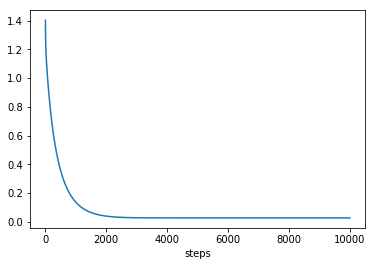

In [205]:
plt.plot(res)
_ = plt.xlabel("steps")

# Problem 2

In [2]:
vocab = pd.read_csv("hw4_data/nyt_vocab.dat",header = None)
vocab.index = range(1,vocab.shape[0]+1)

In [3]:
def construct_doc_vocab_matrix(doc,vocab):
    """
    construct the document-vocabulary-count matrix
    Parameters:
        doc: path of document containing the relationship of doc, word and counts
        vocab: all the vocabulary 
    Returns:
        M: the document-vocabulary-count matrix (#words*#docs), indexes are indexes of words, columns are indexes of documents, values are counts of words in each document 
    """
    with open(doc) as f:
        lines = f.readlines()
    M = np.zeros((vocab.shape[0],len(lines)))
    for i in range(0,len(lines)):
        line = lines[i].strip()
        line = line.split(",")
        for piece in line:
            piece = piece.split(":")
            idx  = int(piece[0])
            cnt = piece[1]
            M[idx-1][i] = cnt
    return M  

In [4]:
X = construct_doc_vocab_matrix(doc = "hw4_data/nyt_data.txt", vocab=vocab)

In [5]:
def NMF_divengence_penalty_iterate(X, k, iterations):
    """
    implement NMF algorithm using the divengence penalty, X = W*H
    this algorithm iterate on k, and takes longer time
    Parameters:
        X: matrix
        k: rank 
        iterations: number of iterations
    Returns:
        W: matrix
        H: matrix
        objective: value of objective function
    """
    W = np.random.uniform(low = 1, high = 2, size = (X.shape[0],k))
    H = np.random.uniform(low = 1, high = 2, size = (k,X.shape[1]))
    objective = []
    for iteration in range(0,iterations):
        #iterate on k
        for k in range(0, H.shape[0]):
            nominator = np.sum(np.multiply(W[:,k].reshape(W.shape[0],1),X)/(np.dot(W,H)+1e-16),axis = 0)
            denominator = np.sum(W[:,k]) + 1e-16
            H[k,:] = np.multiply(H[k,:],nominator/denominator)
        for k in range(0,W.shape[1]):
            nominator = np.sum(np.multiply(H[k,:],X)/(np.dot(W,H)+1e-16),axis = 1)
            denominator = np.sum(H[k,:]) + 1e-16
            W[:,k] = np.multiply(W[:,k],nominator/denominator)
        L = np.sum(np.dot(W,H)-np.multiply(X,np.log(np.dot(W,H)+1e-16)))
        objective.append(L)
    return W, H, objective

In [6]:
def NMF_divengence_penalty(X,k,iterations):
    """
    implement NMF algorithm using the divengence penalty, X = W*H
    this algorithm uses matrix multiplication, is much faster
    Parameters:
        X: matrix
        k: rank 
        iterations: number of iterations
    Returns:
        W: matrix
        H: matrix
        objective: value of objective function
    """
    W = np.random.uniform(low = 1, high = 2, size = (X.shape[0],k))
    H = np.random.uniform(low = 1, high = 2, size = (k,X.shape[1]))
    objective = []
    for iteration in range(0,iterations):
        #update H
        dot_divided = X/(np.dot(W,H)+1e-16)
        W_T_norm_row = W.T/np.sum(W.T,axis = 1)[:,np.newaxis]
        H = np.multiply(H,np.dot(W_T_norm_row,dot_divided))
        #update W
        dot_divided = X/(np.dot(W,H)+1e-16)
        H_T_norm_col = H.T/np.sum(H.T,axis = 0)
        W = np.multiply(W, np.dot(dot_divided,H_T_norm_col))
        #update L
        L = np.sum(np.dot(W,H)-np.multiply(X,np.log(np.dot(W,H)+1e-16)))
        objective.append(L)
    return W, H, objective
    

## a)

In [7]:
W, H, L = NMF_divengence_penalty(X, 25, 100)

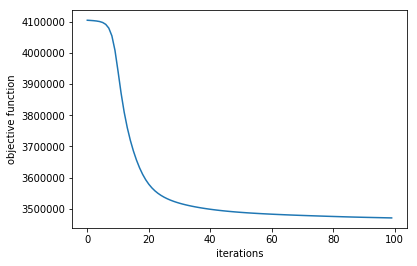

In [8]:
plt.plot(L)
_ = plt.xlabel("iterations")
_ = plt.ylabel("objective function")

## b)

In [53]:
def get_top_n_words(W, n, vocab):
    """
    output the top n words in each document
    Parameters:
        W: matrix
        n: top n
        vocab: map of word index and word 
    Returns:
        res: the top n words and their weights  
    """
    res = []
    W_norm = W/np.sum(W,axis = 0)
    for k in range(0,W.shape[1]):
        index = W_norm[:,k].argsort()[::-1][:n]
        weights = W_norm[index,k]
        weights = pd.DataFrame(weights)
        weights.index = range(1,n+1)
        weights.columns = ["weight"]
        words = vocab.iloc[index,:]
        words.index = range(1,n+1)
        words.columns = ["word"]
        res.append(pd.concat([words,weights],axis = 1).values)
    return res

In [54]:
res = get_top_n_words(W, 10, vocab)

In [55]:
divide_line = ['|']*10
divide_line = pd.DataFrame(divide_line)
divide_line.columns = [" "]

for i in range(0,len(res)):
    if i%5 == 0:
        row = pd.DataFrame(res[i],columns = ["word","weight"])
        row = pd.concat([row,divide_line],axis = 1)
    elif i%5 == 4:
        row = pd.concat([row,pd.DataFrame(res[i],columns = ["word","weight"])],axis = 1)
        display(row)
    else:
        row = pd.concat([row,pd.DataFrame(res[i],columns = ["word","weight"])],axis = 1)
        row = pd.concat([row,divide_line],axis = 1)

,word,weight,,word,weight,,word,weight,,word,weight,,word,weight
0,country,0.0281079,|,father,0.0592482,|,percent,0.0345145,|,computer,0.0176451,|,music,0.023249
1,states,0.0222293,|,son,0.0496586,|,rate,0.0211268,|,television,0.0128523,|,play,0.0199167
2,american,0.0207346,|,mrs,0.0467611,|,rise,0.0180256,|,network,0.0123972,|,performance,0.0137425
3,government,0.0152526,|,daughter,0.0384111,|,price,0.015518,|,company,0.0119993,|,audience,0.0116828
4,world,0.0141447,|,mother,0.038328,|,market,0.0151486,|,technology,0.0111571,|,production,0.0106307
5,nation,0.0120941,|,graduate,0.0298726,|,increase,0.0133412,|,sell,0.00938355,|,perform,0.0101144
6,economic,0.0107259,|,marry,0.0263273,|,low,0.0111934,|,internet,0.0081014,|,stage,0.0100719
7,foreign,0.0104542,|,retire,0.0214101,|,fall,0.0111295,|,product,0.00776954,|,theater,0.00992015
8,political,0.0100021,|,receive,0.0205326,|,average,0.0100285,|,system,0.00761024,|,song,0.0096929
9,americans,0.00908287,|,wife,0.0187959,|,economy,0.0099999,|,program,0.00750919,|,dance,0.00943319


,word,weight,,word,weight,,word,weight,,word,weight,,word,weight
0,editor,0.0389706,|,military,0.0156078,|,police,0.0260262,|,game,0.0215242,|,art,0.0153555
1,article,0.0262413,|,war,0.0144895,|,charge,0.0185666,|,team,0.0188655,|,design,0.0127139
2,letter,0.0237885,|,official,0.0128201,|,man,0.0156799,|,play,0.018073,|,museum,0.0119472
3,newspaper,0.0183223,|,force,0.0105457,|,officer,0.0136643,|,win,0.0154253,|,house,0.0118457
4,information,0.0154861,|,government,0.00947592,|,crime,0.0118221,|,season,0.0146487,|,artist,0.0112191
5,write,0.0146017,|,leader,0.00941764,|,arrest,0.0115096,|,player,0.0146486,|,wall,0.010652
6,news,0.0125926,|,attack,0.0093212,|,case,0.0107816,|,second,0.0127207,|,exhibition,0.0103354
7,member,0.0119532,|,american,0.0088775,|,kill,0.00984638,|,victory,0.00915861,|,open,0.00946457
8,feb,0.0119351,|,peace,0.00827464,|,trial,0.0097625,|,score,0.00840652,|,room,0.00944462
9,publish,0.0114923,|,troop,0.00705818,|,death,0.00916724,|,lose,0.00804439,|,collection,0.0090807


,word,weight,,word,weight,,word,weight,,word,weight,,word,weight
0,school,0.042692,|,city,0.0301024,|,pay,0.0220993,|,food,0.0191606,|,book,0.0158361
1,student,0.0292333,|,building,0.0206547,|,money,0.0168906,|,restaurant,0.0172841,|,life,0.0128186
2,child,0.0209306,|,resident,0.0143534,|,company,0.016074,|,serve,0.0158821,|,write,0.0127499
3,class,0.0154549,|,build,0.0140441,|,buy,0.0126515,|,dinner,0.015414,|,story,0.0100696
4,program,0.0151409,|,project,0.0139736,|,percent,0.0121519,|,taste,0.0114714,|,man,0.00858812
5,college,0.0136025,|,area,0.0123657,|,financial,0.0120141,|,eat,0.0112659,|,character,0.00840919
6,education,0.0133373,|,community,0.0118101,|,share,0.0117158,|,cook,0.00938811,|,world,0.00768374
7,parent,0.0122258,|,plan,0.0113732,|,sell,0.0108623,|,table,0.00935843,|,author,0.00713298
8,teacher,0.0109515,|,property,0.00993139,|,stock,0.0108595,|,lunch,0.00883099,|,history,0.0064431
9,teach,0.00894408,|,neighborhood,0.00932663,|,offer,0.0104547,|,chicken,0.00867295,|,woman,0.00643658


,word,weight,,word,weight,,word,weight,,word,weight,,word,weight
0,campaign,0.0166456,|,man,0.014047,|,official,0.0109631,|,company,0.0378066,|,health,0.0158385
1,vote,0.0163244,|,woman,0.0124592,|,system,0.0107652,|,executive,0.0304299,|,drug,0.0126112
2,political,0.01501,|,young,0.0103017,|,flight,0.00989057,|,president,0.0246958,|,study,0.0123249
3,republican,0.0127959,|,life,0.00936496,|,plane,0.00963441,|,chief,0.0214974,|,doctor,0.0105402
4,election,0.0123402,|,wear,0.00872696,|,air,0.00937711,|,business,0.0212315,|,medical,0.0100211
5,candidate,0.0122962,|,love,0.00792385,|,safety,0.00918127,|,industry,0.0147922,|,patient,0.00959307
6,state,0.0122314,|,friend,0.0078878,|,problem,0.00897906,|,chairman,0.0145706,|,care,0.00916662
7,party,0.0119372,|,tell,0.00721828,|,equipment,0.00801129,|,announce,0.0134184,|,research,0.00891859
8,leader,0.0111118,|,child,0.00720521,|,agency,0.00748636,|,director,0.0121854,|,treatment,0.00847582
9,democratic,0.0101574,|,old,0.00709675,|,cause,0.00748536,|,vice,0.0120034,|,cause,0.00804039


,word,weight,,word,weight,,word,weight,,word,weight,,word,weight
0,ask,0.0203388,|,law,0.0191121,|,water,0.0118611,|,mile,0.0170271,|,point,0.00816744
1,thing,0.0170623,|,case,0.012262,|,small,0.0100885,|,car,0.0137187,|,thing,0.00743929
2,tell,0.0169656,|,court,0.012144,|,pound,0.00959393,|,drive,0.0096721,|,matter,0.00741072
3,lot,0.0120523,|,official,0.0114646,|,large,0.00955958,|,road,0.00944992,|,feel,0.00696325
4,really,0.0115072,|,state,0.011247,|,piece,0.00872078,|,hour,0.00921776,|,question,0.00686759
5,question,0.0109059,|,rule,0.0100193,|,cut,0.00870615,|,water,0.00845227,|,view,0.00625364
6,kind,0.00997391,|,lawyer,0.00993895,|,inch,0.00860838,|,town,0.00797921,|,far,0.00616423
7,happen,0.00864983,|,issue,0.00974583,|,add,0.00855647,|,train,0.00797892,|,understand,0.00599921
8,feel,0.00863632,|,legal,0.00913465,|,cover,0.0076118,|,ride,0.00733273,|,clear,0.00591025
9,ago,0.00811831,|,decision,0.008843,|,remove,0.00733497,|,area,0.00720834,|,sense,0.00553511
